In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from urllib.request import urlopen
from mplsoccer import Pitch, FontManager, VerticalPitch, add_image
from PIL import Image
from statsbombpy import sb

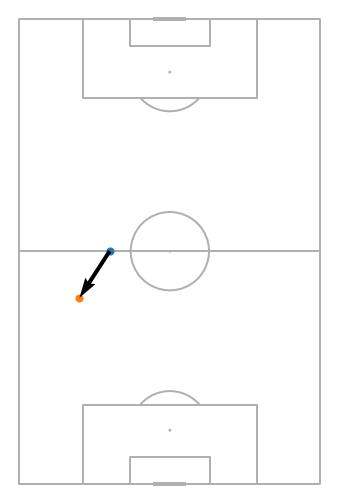

In [14]:
fig ,ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(pitch_type='opta')

pitch.draw(ax=ax)

pitch.scatter(50,70,ax=ax,s=50)
pitch.scatter(40,80,ax=ax,s=50)

pitch.arrows(50,70,40,80,ax=ax)

In [19]:
partido = sb.events(match_id=3869685)

credentials were not supplied. open data access only


In [20]:
partido.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [21]:
partido.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN


In [32]:
partido[['x', 'y']] = partido['location'].apply(pd.Series)
partido[['end_x', 'end_y']] = partido['pass_end_location'].apply(pd.Series)

In [48]:
partido['pasador'] = partido['player']
partido['receptor'] = partido['player'].shift(-1)

partido['player'].shift(-1)


0                            NaN
1                            NaN
2                            NaN
3                            NaN
4                            NaN
                  ...           
4402                         NaN
4403                         NaN
4404              Olivier Giroud
4405    Damián Emiliano Martínez
4406                         NaN
Name: player, Length: 4407, dtype: object

In [55]:
pases_partido = partido[(partido['type'] == 'Pass') & (partido['team'] == 'Argentina')]
pases_partido.shape

(693, 94)

In [56]:
completados = pases_partido[pases_partido['pass_outcome'].isna() == True]

In [57]:
completados[['player', 'location', 'pass_end_location']]

,player,location,pass_end_location
14,Nahuel Molina Lucero,"[22.7, 80.0]","[36.0, 75.2]"
15,Rodrigo Javier De Paul,"[41.1, 73.9]","[23.2, 62.8]"
16,Cristian Gabriel Romero,"[24.7, 59.4]","[21.5, 32.2]"
17,Nicolás Hernán Otamendi,"[24.0, 27.1]","[21.7, 49.3]"
18,Cristian Gabriel Romero,"[22.1, 49.8]","[24.0, 27.3]"
...,...,...,...
1267,Paulo Bruno Exequiel Dybala,"[44.3, 48.3]","[42.8, 54.1]"
1268,Enzo Fernandez,"[42.8, 54.1]","[58.0, 62.4]"
1269,Lionel Andrés Messi Cuccittini,"[66.8, 62.6]","[104.9, 62.6]"
1270,Gonzalo Ariel Montiel,"[109.3, 61.6]","[110.8, 41.6]"


In [58]:
completados[['player', 'x', 'y', 'end_x', 'end_y']]

,player,x,y,end_x,end_y
14,Nahuel Molina Lucero,22.7,80.0,36.0,75.2
15,Rodrigo Javier De Paul,41.1,73.9,23.2,62.8
16,Cristian Gabriel Romero,24.7,59.4,21.5,32.2
17,Nicolás Hernán Otamendi,24.0,27.1,21.7,49.3
18,Cristian Gabriel Romero,22.1,49.8,24.0,27.3
...,...,...,...,...,...
1267,Paulo Bruno Exequiel Dybala,44.3,48.3,42.8,54.1
1268,Enzo Fernandez,42.8,54.1,58.0,62.4
1269,Lionel Andrés Messi Cuccittini,66.8,62.6,104.9,62.6
1270,Gonzalo Ariel Montiel,109.3,61.6,110.8,41.6


In [59]:
completados.groupby('player').mean()[['x', 'y']]

,x,y
player,,
Alexis Mac Allister,68.148889,26.637778
Cristian Gabriel Romero,33.871667,52.686667
Damián Emiliano Martínez,11.433333,42.155556
Enzo Fernandez,55.150633,43.230380
Germán Alejandro Pezzella,53.300000,31.000000
Gonzalo Ariel Montiel,72.262500,71.350000
Julián Álvarez,77.707692,34.746154
Lautaro Javier Martínez,86.260000,37.400000
Leandro Daniel Paredes,54.293333,39.253333


In [60]:
completados[['pasador', 'receptor']]

,pasador,receptor
14,Nahuel Molina Lucero,Rodrigo Javier De Paul
15,Rodrigo Javier De Paul,Cristian Gabriel Romero
16,Cristian Gabriel Romero,Nicolás Hernán Otamendi
17,Nicolás Hernán Otamendi,Cristian Gabriel Romero
18,Cristian Gabriel Romero,Nicolás Hernán Otamendi
...,...,...
1267,Paulo Bruno Exequiel Dybala,Enzo Fernandez
1268,Enzo Fernandez,Lionel Andrés Messi Cuccittini
1269,Lionel Andrés Messi Cuccittini,Gonzalo Ariel Montiel
1270,Gonzalo Ariel Montiel,Hugo Lloris


In [68]:
firstSub = partido[(partido['type'] == 'Substitution') & (partido['team'] == 'Argentina')].minute.min()
firstSub

63

In [99]:
completados = completados[completados['minute'] < firstSub]

In [100]:
average_locations = completados.groupby('player').agg({'x': ['mean'], 'y': ['mean', 'count']})
average_locations.columns = ['x', 'y', 'count']
average_locations

,x,y,count
player,,,
Alexis Mac Allister,68.737500,23.845833,24
Cristian Gabriel Romero,33.905128,53.346154,39
Damián Emiliano Martínez,12.641667,43.966667,12
Enzo Fernandez,56.135000,36.532500,40
Julián Álvarez,76.346154,37.538462,13
Lionel Andrés Messi Cuccittini,71.588889,51.096296,27
Nahuel Molina Lucero,59.414286,72.085714,28
Nicolás Alejandro Tagliafico,58.567857,7.335714,28
Nicolás Hernán Otamendi,38.279545,23.350000,44


In [101]:
pass_between = completados.groupby(['pasador', 'receptor']).id.count().reset_index()
pass_between.rename({'id': 'pass_count'}, axis='columns',inplace=True)

In [102]:
pass_between = pass_between.merge(average_locations, left_on='pasador', right_index=True)
pass_between = pass_between.merge(average_locations, left_on='receptor', right_index=True, suffixes=['','_end'])
pass_between

,pasador,receptor,pass_count,x,y,count,x_end,y_end,count_end
0,Alexis Mac Allister,Enzo Fernandez,6,68.737500,23.845833,24,56.135000,36.532500,40
12,Cristian Gabriel Romero,Enzo Fernandez,7,33.905128,53.346154,39,56.135000,36.532500,40
20,Damián Emiliano Martínez,Enzo Fernandez,1,12.641667,43.966667,12,56.135000,36.532500,40
27,Enzo Fernandez,Enzo Fernandez,1,56.135000,36.532500,40,56.135000,36.532500,40
36,Julián Álvarez,Enzo Fernandez,3,76.346154,37.538462,13,56.135000,36.532500,40
...,...,...,...,...,...,...,...,...,...
26,Enzo Fernandez,Cristian Gabriel Romero,6,56.135000,36.532500,40,33.905128,53.346154,39
43,Lionel Andrés Messi Cuccittini,Cristian Gabriel Romero,1,71.588889,51.096296,27,33.905128,53.346154,39
51,Nahuel Molina Lucero,Cristian Gabriel Romero,1,59.414286,72.085714,28,33.905128,53.346154,39
66,Nicolás Hernán Otamendi,Cristian Gabriel Romero,12,38.279545,23.350000,44,33.905128,53.346154,39


In [103]:
pass_between = pass_between[pass_between['pass_count'] > 1]
pass_between

,pasador,receptor,pass_count,x,y,count,x_end,y_end,count_end
0,Alexis Mac Allister,Enzo Fernandez,6,68.737500,23.845833,24,56.135000,36.532500,40
12,Cristian Gabriel Romero,Enzo Fernandez,7,33.905128,53.346154,39,56.135000,36.532500,40
36,Julián Álvarez,Enzo Fernandez,3,76.346154,37.538462,13,56.135000,36.532500,40
44,Lionel Andrés Messi Cuccittini,Enzo Fernandez,2,71.588889,51.096296,27,56.135000,36.532500,40
53,Nahuel Molina Lucero,Enzo Fernandez,2,59.414286,72.085714,28,56.135000,36.532500,40
60,Nicolás Alejandro Tagliafico,Enzo Fernandez,4,58.567857,7.335714,28,56.135000,36.532500,40
68,Nicolás Hernán Otamendi,Enzo Fernandez,10,38.279545,23.350000,44,56.135000,36.532500,40
77,Rodrigo Javier De Paul,Enzo Fernandez,3,59.159459,59.248649,37,56.135000,36.532500,40
84,Ángel Fabián Di María Hernández,Enzo Fernandez,3,79.884000,11.448000,25,56.135000,36.532500,40
13,Cristian Gabriel Romero,Julián Álvarez,2,33.905128,53.346154,39,76.346154,37.538462,13


In [113]:
MAX_LINE_WIDTH = 13
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)

MIN_TRANSPARENCY = 0.000001
color = np.array(to_rgba('yellow'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

MAX_MARKER_SIZE=800
average_locations['marker_size'] = (average_locations['count'] / average_locations['count'].max() * MAX_MARKER_SIZE)

<ipython-input-113-023211e1f780>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)


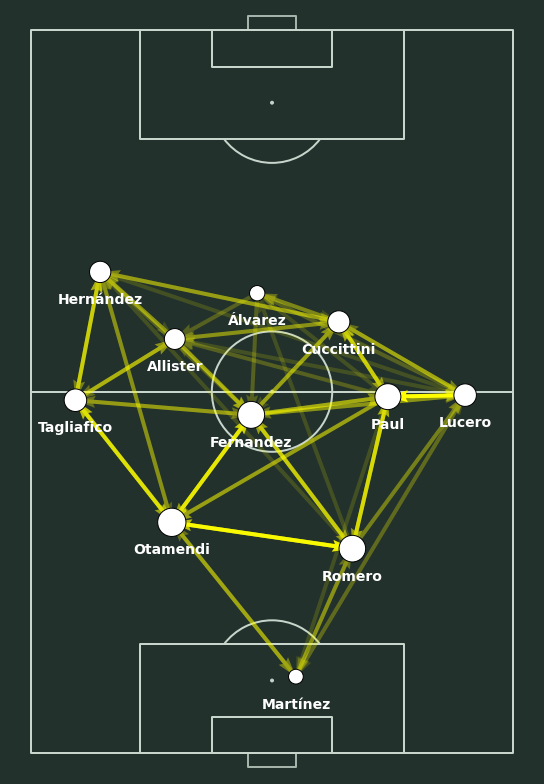

In [128]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

arrows = pitch.arrows(pass_between.x, pass_between.y, pass_between.x_end, pass_between.y_end, ax=ax, color=color, zorder=.99)

nodes = pitch.scatter(average_locations.x, average_locations.y, ax=ax, color='white', ec='black', s=average_locations['marker_size'])

for index, row in pass_between[['pasador', 'x', 'y']].drop_duplicates(subset='pasador').iterrows():
    pitch.annotate(row.pasador.split(' ')[-1], xy=(row.x-4.5, row.y), c='white', va='center',
                       ha='center', size=14, weight='bold', ax=ax,zorder=1)


In [126]:
for index, row in pass_between[['pasador', 'x', 'y']].drop_duplicates(subset='pasador').iterrows():
    print(row.pasador.split(' ')[-1])

Allister
Romero
Álvarez
Cuccittini
Lucero
Tagliafico
Otamendi
Paul
Hernández
Fernandez
Martínez
